In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("weather_data.csv")

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [28]:
df.tail()

,humidity,prediction_arima
date,,
2016-12-28,68.043478,65.509251
2016-12-29,87.857143,68.804135
2016-12-30,89.666667,83.589601
2016-12-31,87.000000,85.746238
2017-01-01,100.000000,81.062923


In [5]:
from pandas_profiling import ProfileReport


C:\Users\hp\AppData\Local\Temp\ipykernel_320\3063248848.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [6]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df = df.drop(['meantemp', 'wind_speed', 'meanpressure'], axis=1)
df

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [9]:
df = df.groupby('date')['humidity'].sum().reset_index()

In [10]:
df

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [11]:
df.date = pd.to_datetime(df.date)
df.head()

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333


In [12]:
df.set_index(['date'], inplace = True)
df.head()

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333


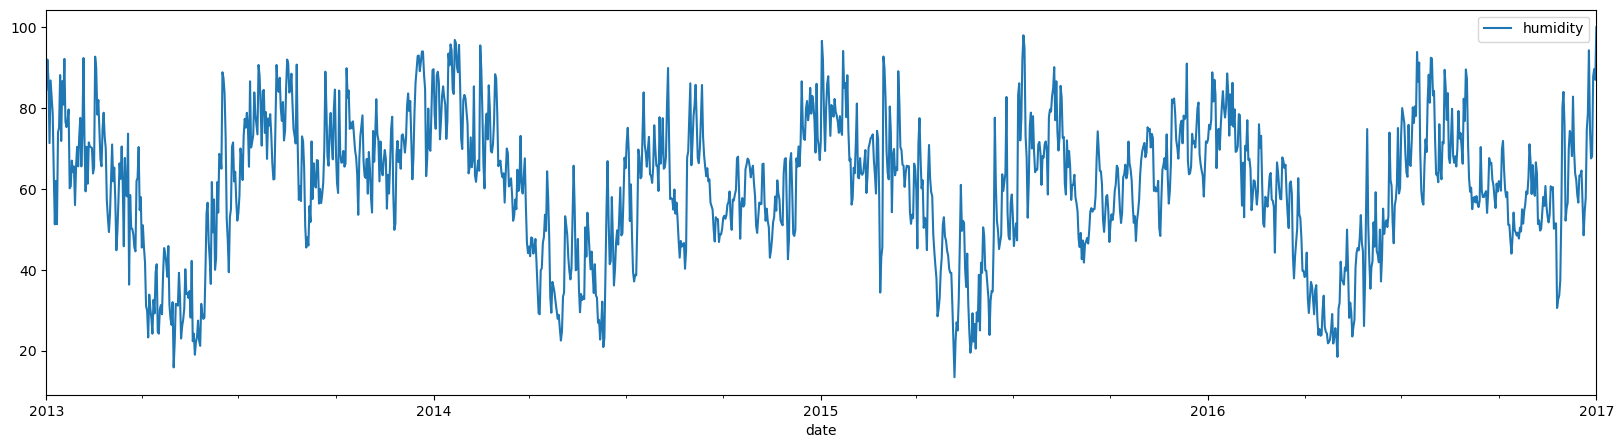

In [13]:
%matplotlib inline
df.plot(figsize=(20, 5))
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print(f'ADF Statistic, {result[0]}')
print(f'p_value = {result[1]}')
print(f' n_lags,{result[2]}')

if (result[1]>0.05):
    print("The Series is not stationary")
else:
    print("The Series is Stationary")

ADF Statistic, -3.6755769191633383
p_value = 0.004470100478130771
 n_lags,15
The Series is Stationary


array([<AxesSubplot:xlabel='date'>], dtype=object)

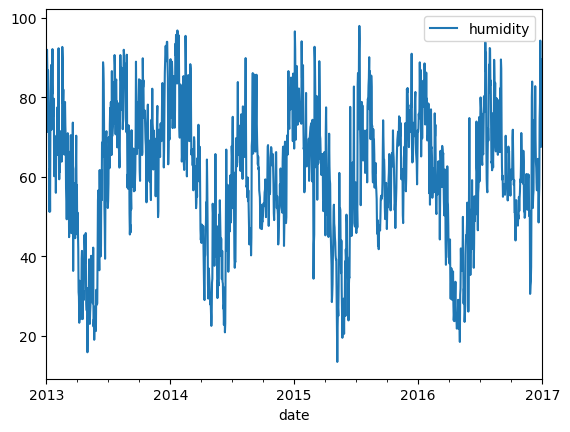

In [42]:
df.plot(subplots=True)

In [35]:
# diff1 = df = df.shift(1)
# diff1 = diff1.dropna()

In [37]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(diff1)
# print(f'ADF Statistic, {result[0]}')
# print(f'p_value = {result[1]}')
# print(f' n_lags,{result[2]}')

# if (result[1]>0.05):
#     print("The Series is not stationary")
# else:
#     print("The Series is Stationary")

ADF Statistic, -3.7375382997902244
p_value = 0.0036150791308486403
 n_lags,15
The Series is Stationary


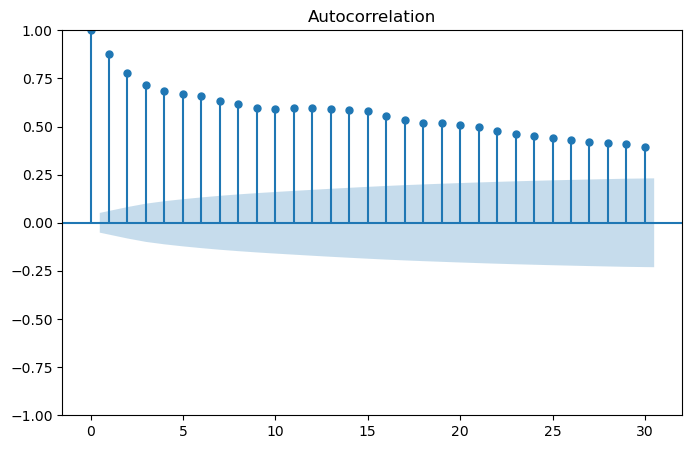

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig,ax = plt.subplots(figsize = (8,5))
plot_acf(df['humidity'], ax = ax, lags = 30)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


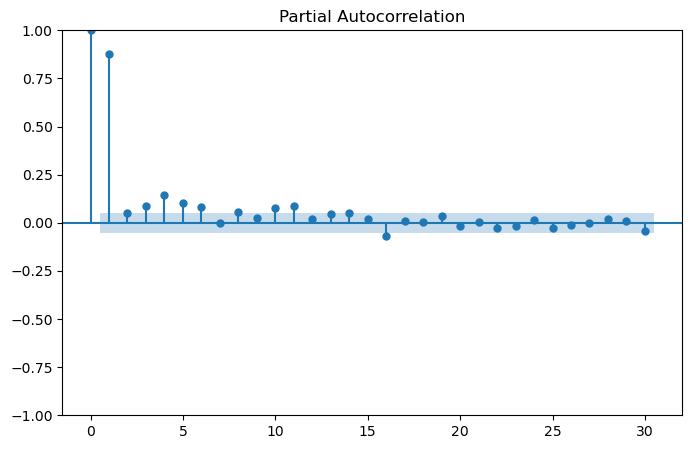

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
plot_pacf(df['humidity'], ax = ax, lags=30)
plt.show()

In [18]:
from tqdm import tqdm

def optimize_sarima(endog, order__list):
    
    results = []
    
    for order in tqdm(order_list, desc="Fitting SARIMA models"):
        try:
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results, columns = ['(p, d,q)', 'AIC'])
    
    result_df = result_df.sort_values(by = 'AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [19]:
from itertools import product

ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
    
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [22]:
result_df = optimize_sarima(df['humidity'], order_list)
result_df

Fitting SARIMA models: 100%|████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 63399.97it/s]


,"(p, d,q)",AIC


In [23]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['humidity'], order = (6, 1, 6)) #not getting value of pdq so plotted it randomly

result = model.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -5068.272
Date:                Tue, 25 Jul 2023   AIC                          10162.544
Time:                        15:50:28   BIC                          10231.273
Sample:                    01-01-2013   HQIC                         10188.182
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1041      0.243      0.429      0.668      -0.371       0.579
ar.L2          0.3514      0.179      1.961      0.050       0.000       0.703
ar.L3         -0.4993      0.081     -6.160      0.000      -0.658      -0.340
ar.L4          0.3348      0.160      2.093      0.036       0.021       0.648
ar.L5          0.6314      0.065      9.754      0.000       0.505       0.758
ar.L6         -0.4693      0.119     -3.955      0.000      -0.702      -0.237
ma.L1         -0.3232      0.246     -1.312      0.189      -0.806       0.160
ma.L2         -0.5077      0.124     -4.084      0.000      -0.751      -0.264
ma.L3          0.4422      0.059      7.537      0.000       0.327       0.557
ma.L4         -0.4590      0.088     -5.217      0.000      -0.631      -0.287
ma.L5         -0.6307      0.061    -10.331      0.000      -0.750      -0.511
ma.L6          0.6616      0.190      3.489      0.000       0.290       1.033
sigma2        60.2448      1.791     33.630      0.000      56.734      63.756
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               174.72
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

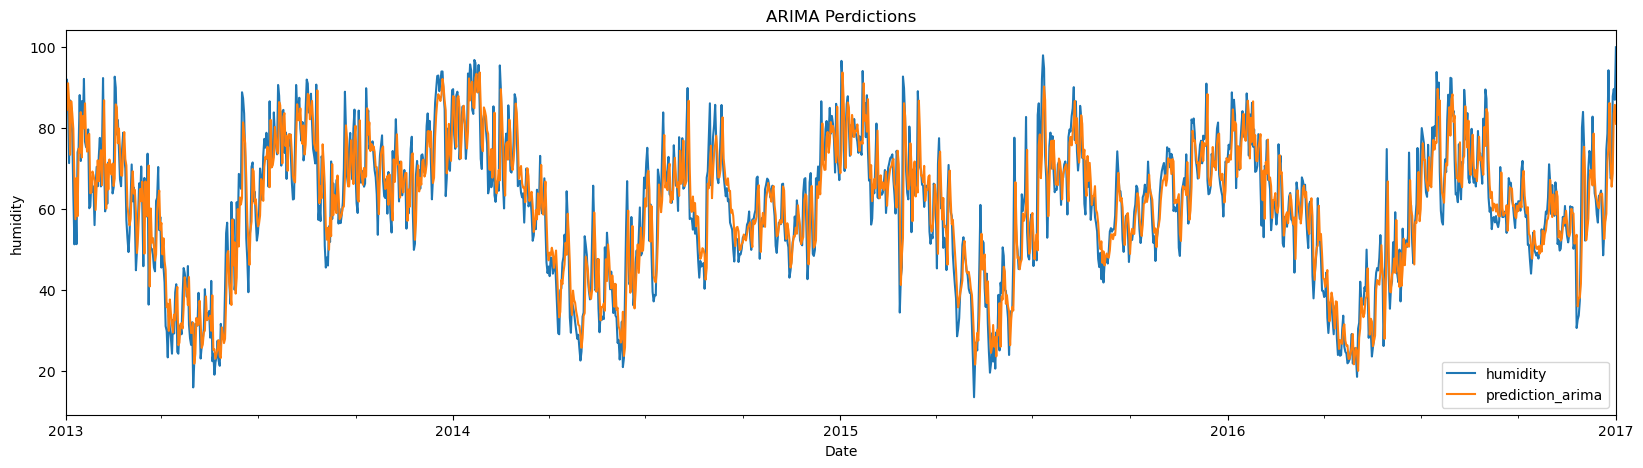

In [24]:
df['prediction_arima'] = result.predict(start=1, end=1462)

df[['humidity', 'prediction_arima']].plot(figsize=(20, 5))

plt.xlabel('Date')
plt.ylabel('humidity')
plt.title('ARIMA Perdictions')
plt.show()

In [25]:
forecast = result.forecast(90)
forecast

2017-01-02    92.685842
2017-01-03    88.519277
2017-01-04    86.546796
2017-01-05    84.886903
2017-01-06    81.997283
                ...    
2017-03-28    84.371180
2017-03-29    84.201145
2017-03-30    84.415828
2017-03-31    84.348429
2017-04-01    84.459981
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [26]:
for i in forecast:
    print(round(i, 0))

93.0
89.0
87.0
85.0
82.0
83.0
83.0
84.0
83.0
83.0
83.0
84.0
85.0
84.0
84.0
84.0
85.0
85.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
85.0
85.0
84.0
84.0
84.0
85.0
85.0
85.0
84.0
84.0
85.0
85.0
85.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
84.0
85.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0
84.0


<AxesSubplot:>

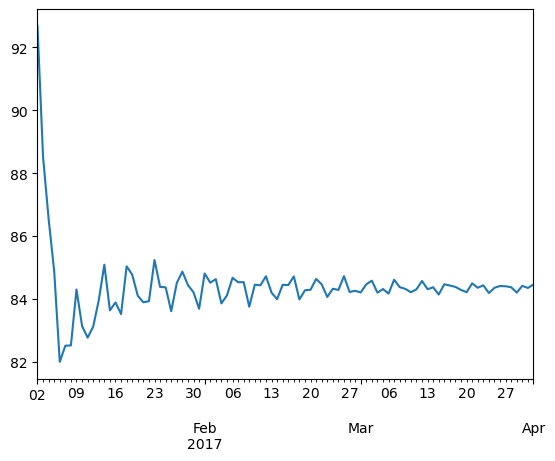

In [27]:
forecast.plot()

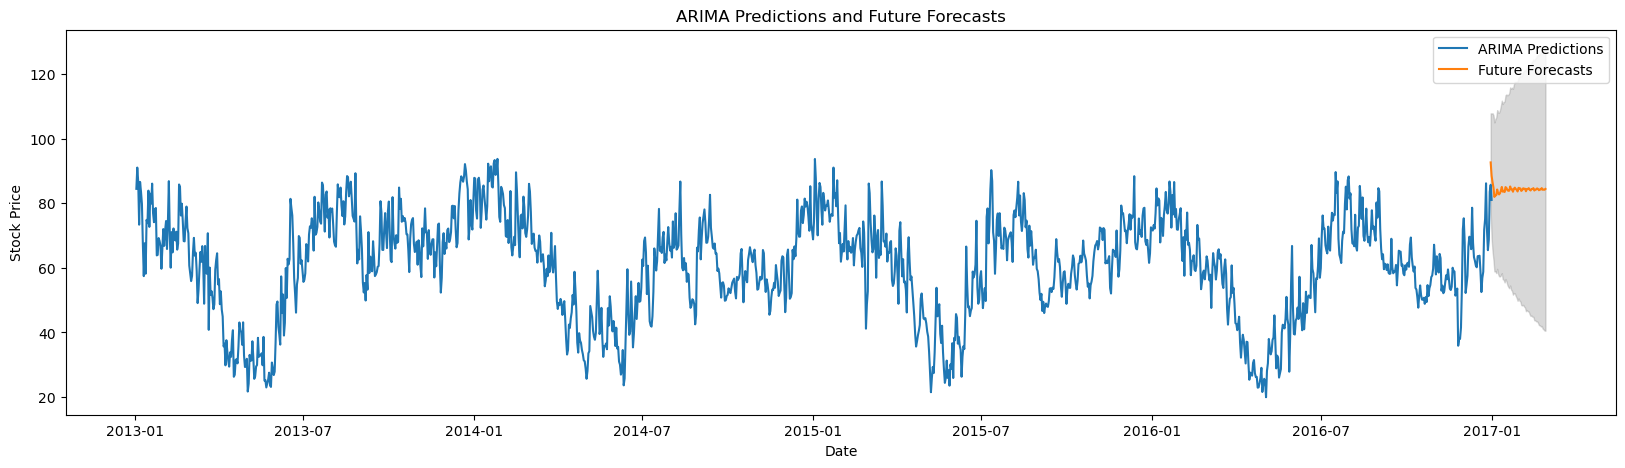

In [32]:
forecast1 = result.get_forecast(steps=60)

forecast_values = forecast1.predicted_mean
forecast_confidence = forecast1.conf_int()

start_date = '2016-12-31'
end_date = pd.date_range(start=start_date, periods = len(forecast_values), freq='D')

plt.figure(figsize=(20,5))
plt.plot(df.index,df['prediction_arima'], label='ARIMA Predictions')
plt.plot(end_date, forecast_values, label='Future Forecasts')
plt.fill_between(end_date, forecast_confidence.iloc[:,0], forecast_confidence.iloc[:,1], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Predictions and Future Forecasts')
plt.legend()
plt.show()